## Ontologies and Document Classification 

Ontologies are sets of words that are used to help discern what is being talked about in digitized, text based information. 

In [1]:
#install.packages("tidytext")

### An Opening Example

Let's count the number of words in Jane Austen Novels. 

In [89]:
library(dplyr)
library(janeaustenr)
library(tidytext)

book_words <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE) %>%
  ungroup()

head(book_words)

book,word,n
Mansfield Park,the,6206
Mansfield Park,to,5475
Mansfield Park,and,5438
Emma,to,5239
Emma,the,5201
Emma,and,4896


In [90]:
a <- austen_books()

head(a)

text,book
SENSE AND SENSIBILITY,Sense & Sensibility
,Sense & Sensibility
by Jane Austen,Sense & Sensibility
,Sense & Sensibility
(1811),Sense & Sensibility
,Sense & Sensibility


In [91]:
b <- austen_books() %>%
    unnest_tokens(word, text)

head(b)

book,word
Sense & Sensibility,sense
Sense & Sensibility,and
Sense & Sensibility,sensibility
Sense & Sensibility,by
Sense & Sensibility,jane
Sense & Sensibility,austen


In [92]:
c <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE)

head(c, 10)

book,word,n
Mansfield Park,the,6206
Mansfield Park,to,5475
Mansfield Park,and,5438
Emma,to,5239
Emma,the,5201
Emma,and,4896
Mansfield Park,of,4778
Pride & Prejudice,the,4331
Emma,of,4291
Pride & Prejudice,to,4162


In [93]:
d <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE) %>%
  ungroup()

head(d, 20)

book,word,n
Mansfield Park,the,6206
Mansfield Park,to,5475
Mansfield Park,and,5438
Emma,to,5239
Emma,the,5201
Emma,and,4896
Mansfield Park,of,4778
Pride & Prejudice,the,4331
Emma,of,4291
Pride & Prejudice,to,4162


In [94]:
total_words <- book_words %>% 
  group_by(book) %>% 
  summarize(total = sum(n))

In [95]:
head(total_words, 10)

book,total
Sense & Sensibility,119957
Pride & Prejudice,122204
Mansfield Park,160460
Emma,160996
Northanger Abbey,77780
Persuasion,83657


In [96]:
book_words <- left_join(book_words, total_words)

book_words

Joining, by = "book"


book,word,n,total
Mansfield Park,the,6206,160460
Mansfield Park,to,5475,160460
Mansfield Park,and,5438,160460
Emma,to,5239,160996
Emma,the,5201,160996
Emma,and,4896,160996
Mansfield Park,of,4778,160460
Pride & Prejudice,the,4331,122204
Emma,of,4291,160996
Pride & Prejudice,to,4162,122204


There is one row in this book_words data frame for each word-book combination; n is the number of times that word is used in that book and total is the total words in that book. The usual suspects are here with the highest n, “the”, “and”, “to”, and so forth. In Figure 3.1, let’s look at the distribution of n/total for each novel, the number of times a word appears in a novel divided by the total number of terms (words) in that novel. This is exactly what term frequency is.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 896 rows containing non-finite values (stat_bin).”

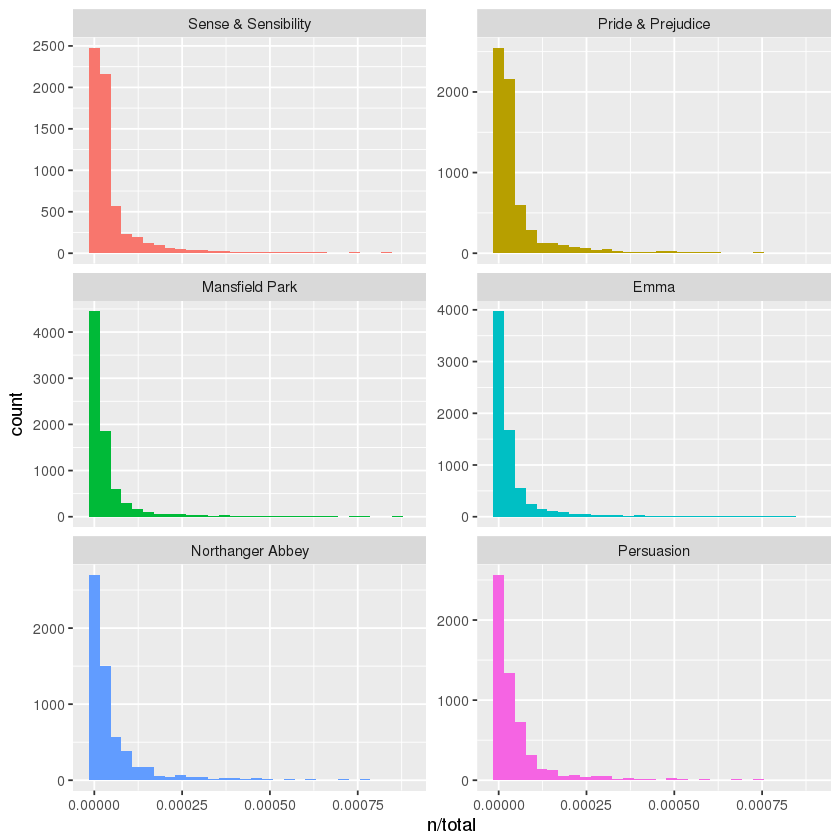

In [97]:
library(ggplot2)

ggplot(book_words, aes(n/total, fill = book)) +
  geom_histogram(show.legend = FALSE) +
  xlim(NA, 0.0009) +
  facet_wrap(~book, ncol = 2, scales = "free_y")

The idea of tf-idf is to find the important words for the content of each document by decreasing the weight for commonly used words and increasing the weight for words that are not used very much in a collection or corpus of documents, in this case, the group of Jane Austen’s novels as a whole. Calculating tf-idf attempts to find the words that are important (i.e., common) in a text, but not too common. Let’s do that now.

The bind_tf_idf function in the tidytext package takes a tidy text dataset as input with one row per token (term), per document. One column (word here) contains the terms/tokens, one column contains the documents (book in this case), and the last necessary column contains the counts, how many times each document contains each term (n in this example). We calculated a total for each book for our explorations in previous sections, but it is not necessary for the bind_tf_idf function; the table only needs to contain all the words in each document.

In [98]:
book_words <- book_words %>%
  bind_tf_idf(word, book, n)

book_words

book,word,n,total,tf,idf,tf_idf
Mansfield Park,the,6206,160460,0.03867631,0,0
Mansfield Park,to,5475,160460,0.03412065,0,0
Mansfield Park,and,5438,160460,0.03389007,0,0
Emma,to,5239,160996,0.03254118,0,0
Emma,the,5201,160996,0.03230515,0,0
Emma,and,4896,160996,0.03041069,0,0
Mansfield Park,of,4778,160460,0.02977689,0,0
Pride & Prejudice,the,4331,122204,0.03544074,0,0
Emma,of,4291,160996,0.02665284,0,0
Pride & Prejudice,to,4162,122204,0.03405780,0,0


Notice that idf and thus tf-idf are zero for these extremely common words. These are all words that appear in all six of Jane Austen’s novels, so the idf term (which will then be the natural log of 1) is zero. The inverse document frequency (and thus tf-idf) is very low (near zero) for words that occur in many of the documents in a collection; this is how this approach decreases the weight for common words. The inverse document frequency will be a higher number for words that occur in fewer of the documents in the collection.

Let’s look at terms with high tf-idf in Jane Austen’s works.

In [99]:
book_words %>%
  select(-total) %>%
  arrange(desc(tf_idf))

book,word,n,tf,idf,tf_idf
Sense & Sensibility,elinor,623,0.005193528,1.7917595,0.009305552
Sense & Sensibility,marianne,492,0.004101470,1.7917595,0.007348847
Mansfield Park,crawford,493,0.003072417,1.7917595,0.005505032
Pride & Prejudice,darcy,373,0.003052273,1.7917595,0.005468939
Persuasion,elliot,254,0.003036207,1.7917595,0.005440153
Emma,emma,786,0.004882109,1.0986123,0.005363545
Northanger Abbey,tilney,196,0.002519928,1.7917595,0.004515105
Emma,weston,389,0.002416209,1.7917595,0.004329266
Pride & Prejudice,bennet,294,0.002405813,1.7917595,0.004310639
Persuasion,wentworth,191,0.002283132,1.7917595,0.004090824


Let’s look at a visualization for these high tf-idf words

In [104]:
plot_austen <- book_words %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word))))

head(plot_austen, 100)

book,word,n,total,tf,idf,tf_idf
Sense & Sensibility,elinor,623,119957,0.005193528,1.7917595,0.009305552
Sense & Sensibility,marianne,492,119957,0.004101470,1.7917595,0.007348847
Mansfield Park,crawford,493,160460,0.003072417,1.7917595,0.005505032
Pride & Prejudice,darcy,373,122204,0.003052273,1.7917595,0.005468939
Persuasion,elliot,254,83657,0.003036207,1.7917595,0.005440153
Emma,emma,786,160996,0.004882109,1.0986123,0.005363545
Northanger Abbey,tilney,196,77780,0.002519928,1.7917595,0.004515105
Emma,weston,389,160996,0.002416209,1.7917595,0.004329266
Pride & Prejudice,bennet,294,122204,0.002405813,1.7917595,0.004310639
Persuasion,wentworth,191,83657,0.002283132,1.7917595,0.004090824


Selecting by tf_idf


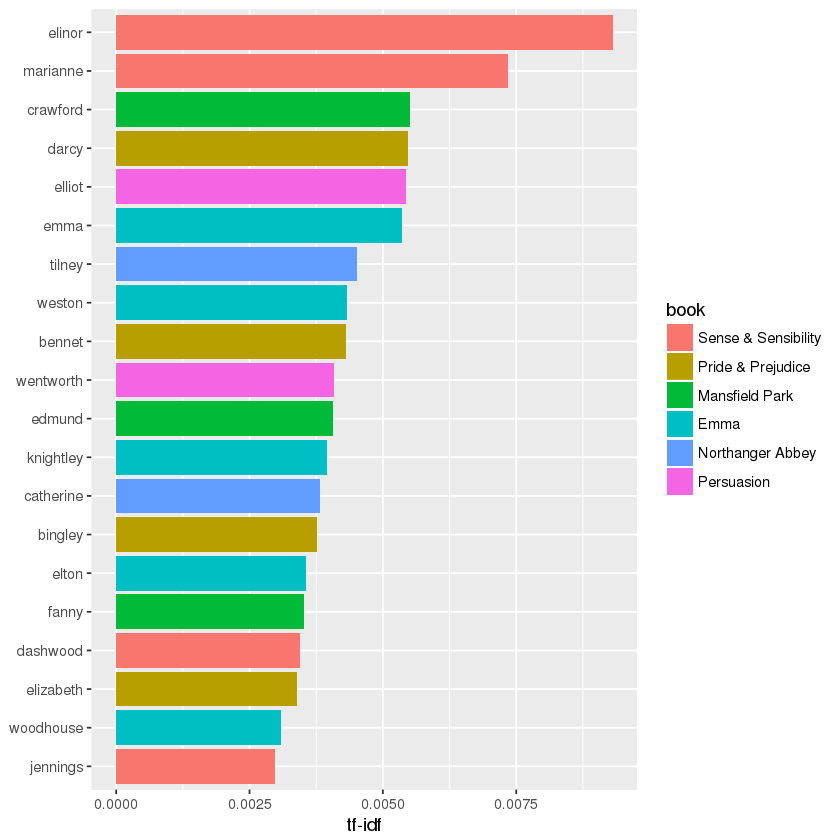

In [101]:
plot_austen %>% 
  top_n(20) %>%
  ggplot(aes(word, tf_idf, fill = book)) +
  geom_col() +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()

And, if you're really into Jane Austen, you'll probably want to see the novels individually. 

Selecting by tf_idf


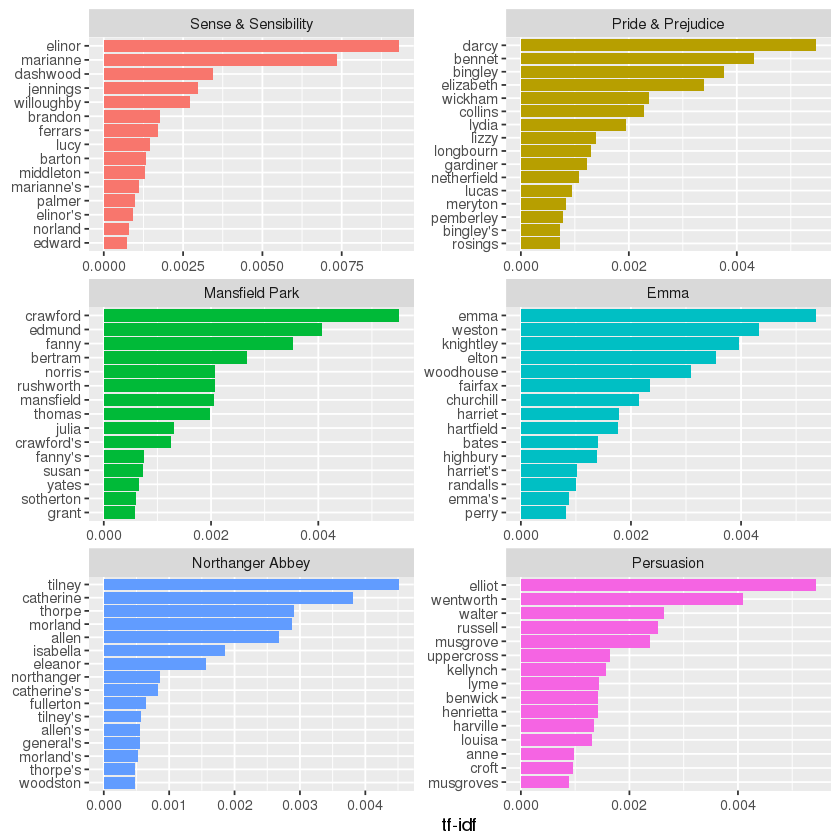

In [102]:
plot_austen %>% 
  group_by(book) %>% 
  top_n(15) %>% 
  ungroup %>%
  ggplot(aes(word, tf_idf, fill = book)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~book, ncol = 2, scales = "free") +
  coord_flip()